In [16]:
train = pd.read_csv(r"C:\Users\King alagbe\Documents\Trainn.csv")
test = pd.read_csv(r"C:\Users\King alagbe\Documents\Testt.csv")
sample = pd.read_csv(r"C:\Users\King alagbe\Documents\Samplesubmission.csv")

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test['form_field47'] = labelencoder.fit_transform(test['form_field47'])
train['form_field47'] = labelencoder.fit_transform(train['form_field47'])
train['default_status'] = labelencoder.fit_transform(train['default_status'])

In [6]:
train = train.round(3)
test = test.round(3)


In [7]:
to_drop = [columns for columns in train.columns[train.isnull().mean()>=0.3]]
to_drop.extend([columns for columns in train.columns if columns not in ['Applicant_ID']
                if train[columns].std() == 0])
to_drop.append('Applicant_ID')
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
print("%f columns were dropped"%(len(to_drop)))

12.000000 columns were dropped


In [20]:
c = train.drop(['Applicant_ID'], axis= 1)
c

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0000,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.392854,2.02,0.711632,0.0,0.0,0,NaN,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0000,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.314281,8.08,0.183584,NaN,0.0,0,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0000,6.282,NaN,956940.0,NaN,192944.0,1079864.0,...,0.162965,18.18,0.791136,0.0,0.0,0,NaN,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0000,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.488884,2.02,0.685168,NaN,0.0,0,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0000,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.275000,12.12,0.438168,0.0,0.0,0,97.887502,1.427891,0.045630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,3740.0,0.01730,0.0000,0.0000,0.000,770998.0,9637475.0,4047934.0,11641992.0,19910965.0,...,0.000000,9.09,0.730040,NaN,0.0,1,591.048913,0.000000,0.241598,0
55996,3360.0,2.01145,0.6252,0.0000,0.000,NaN,927765.0,NaN,NaN,1849306.0,...,0.297913,30.30,0.498208,NaN,0.0,1,NaN,0.000000,NaN,1
55997,3500.0,0.76640,0.0000,0.0000,0.000,118645.0,3662435.0,3662435.0,3585024.0,704090.0,...,0.550000,3.03,0.450512,0.0,0.0,1,1252.474467,2.000000,0.163153,0
55998,3280.0,0.05235,2.0916,2.2212,0.000,NaN,3458599.0,NaN,115533.0,3458599.0,...,0.942854,0.00,0.705048,1.0,0.0,0,NaN,0.000000,0.002997,0


In [21]:
b =test.drop(['Applicant_ID'], axis  = 1)


In [22]:
c.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.392854,2.02,0.711632,0.0,0.0,0,NaN,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.314281,8.08,0.183584,NaN,0.0,0,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,...,0.162965,18.18,0.791136,0.0,0.0,0,NaN,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.488884,2.02,0.685168,NaN,0.0,0,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.275000,12.12,0.438168,0.0,0.0,0,97.887502,1.427891,0.045630,0


In [11]:
train['total_severity'] = train['form_field3']-train['form_field4']
test['total_severity'] = test['form_field3']-test['form_field4']
train['form_field47_grouped'] = train.groupby('form_field47')['form_field14'].transform("mean")
test['form_field47_grouped'] = test.groupby('form_field47')['form_field14'].transform("mean")
train['form_field1'] = train['form_field1'].fillna(train['form_field1'].mean())
test['form_field1'] = test['form_field1'].fillna(test['form_field1'].mean())
train['diff_field8_field6'] = train['form_field8']-train['form_field6']
test['diff_field8_field6'] = test['form_field8']-test['form_field6']
train['diff_field50_field44'] = train['form_field50']-train['form_field44']
test['diff_field50_field44'] = test['form_field50']-test['form_field44']

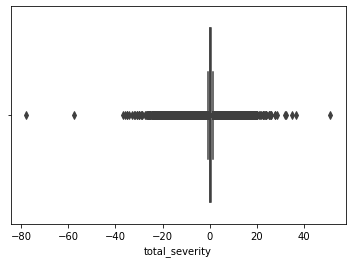

In [11]:
import seaborn as sns
sns.boxplot(x=train['total_severity'])


In [26]:
def fix_outlier(df, column):
    df[column] = np.where(df[column]>df[column].quantile(0.95),
                         df[column].median(),
                         df[column])
    return df[column]

In [28]:
for col in c.columns:
    fix_outlier(c, col)

TypeError: can't multiply sequence by non-int of type 'float'

train['form_field3'] = train['form_field3'].fillna(train['form_field3'].mean())
test['form_field3'] = test['form_field3'].fillna(test['form_field3'].mean())
train['form_field4'] = train['form_field4'].fillna(train['form_field4'].mean())
test['form_field4'] = test['form_field4'].fillna(test['form_field4'].mean())
train['form_field5'] = train['form_field5'].fillna(train['form_field5'].mean())
test['form_field5'] = test['form_field5'].fillna(test['form_field5'].mean())
train['form_field10'] = train['form_field10'].fillna(train['form_field10'].mean())
test['form_field10'] = test['form_field10'].fillna(test['form_field10'].mean())
train['form_field19'] = train['form_field19'].fillna(train['form_field19'].mean())
test['form_field19'] = test['form_field19'].fillna(test['form_field19'].mean())
train['form_field28'] = train['form_field28'].fillna(train['form_field28'].mean())
test['form_field28'] = test['form_field28'].fillna(test['form_field28'].mean())
train['form_field29'] = train['form_field29'].fillna(train['form_field29'].mean())
test['form_field29'] = test['form_field29'].fillna(test['form_field29'].mean())
train['form_field34'] = train['form_field34'].fillna(train['form_field34'].mean())
test['form_field34'] = test['form_field34'].fillna(test['form_field34'].mean())
train['form_field38'] = train['form_field38'].fillna(train['form_field38'].mean())
test['form_field38'] = test['form_field38'].fillna(test['form_field38'].mean())
train['form_field49'] = train['form_field49'].fillna(train['form_field49'].mean())
test['form_field49'] = test['form_field49'].fillna(test['form_field49'].mean())
train['total_severity'] = train['total_severity'].fillna(train['total_severity'].mean())
test['total_severity'] = test['total_severity'].fillna(test['total_severity'].mean())

In [23]:

train = c.fillna(-999, axis =1)
test = b.fillna(-999, axis =1)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_trans = sc.fit_transform(train.drop(['defaulty56fcxb vcxz_status'], axis = 1))
test_trans = sc.transform(test)

In [25]:
y = train.default_status
X = train_trans

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

In [13]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
pred_y = cat.predict_proba(X_test)
print(roc_auc_score(y_test, pred_y[:,1]))
scores = cross_val_score(cat,pred_y, y_test,scoring='roc_auc')
scores

Learning rate set to 0.052243
0:	learn: 0.6598930	total: 567ms	remaining: 9m 26s
1:	learn: 0.6324346	total: 634ms	remaining: 5m 16s
2:	learn: 0.6074779	total: 696ms	remaining: 3m 51s
3:	learn: 0.5870127	total: 749ms	remaining: 3m 6s
4:	learn: 0.5680896	total: 819ms	remaining: 2m 43s
5:	learn: 0.5537421	total: 889ms	remaining: 2m 27s
6:	learn: 0.5402544	total: 959ms	remaining: 2m 16s
7:	learn: 0.5277468	total: 1.04s	remaining: 2m 9s
8:	learn: 0.5162218	total: 1.12s	remaining: 2m 2s
9:	learn: 0.5067121	total: 1.18s	remaining: 1m 56s
10:	learn: 0.4986552	total: 1.24s	remaining: 1m 51s
11:	learn: 0.4911241	total: 1.31s	remaining: 1m 48s
12:	learn: 0.4844831	total: 1.38s	remaining: 1m 44s
13:	learn: 0.4782280	total: 1.44s	remaining: 1m 41s
14:	learn: 0.4728341	total: 1.51s	remaining: 1m 39s
15:	learn: 0.4679254	total: 1.57s	remaining: 1m 36s
16:	learn: 0.4630237	total: 1.64s	remaining: 1m 34s
17:	learn: 0.4588813	total: 1.71s	remaining: 1m 33s
18:	learn: 0.4554068	total: 1.77s	remaining: 1m

array([0.84636472, 0.83047247, 0.84199016, 0.83228969])

In [14]:
np.mean(scores)

0.837779261050742

In [30]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
stf = StratifiedKFold(n_splits=35, random_state=43, shuffle = True)
stf.get_n_splits(X,y)
scores = []
for train, test in stf.split(X,y):
    x_train, x_test = X[train], X[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    cat = CatBoostClassifier(n_estimators=10000,reg_lambda=25)
    cat.fit(X,y,eval_set=[(x_train,y_train), (x_test,y_test)],early_stopping_rounds= 500, metric_period = 1000)
    scores.append(accuracy_score(y_test,cat.predict(x_test)))
    test_scores += cat.predict_proba(test_trans)[:,1]
    

0:	learn: 0.6738143	test: 0.6738171	test1: 0.6737184	best: 0.6737184 (0)	total: 89.5ms	remaining: 14m 54s
1000:	learn: 0.3746560	test: 0.3743835	test1: 0.3839207	best: 0.3839207 (1000)	total: 1m	remaining: 9m 1s
2000:	learn: 0.3491968	test: 0.3489799	test1: 0.3565718	best: 0.3565718 (2000)	total: 1m 59s	remaining: 7m 55s
3000:	learn: 0.3285930	test: 0.3283886	test1: 0.3355432	best: 0.3355432 (3000)	total: 2m 57s	remaining: 6m 54s
4000:	learn: 0.3084064	test: 0.3082450	test1: 0.3138929	best: 0.3138929 (4000)	total: 3m 57s	remaining: 5m 55s
5000:	learn: 0.2906313	test: 0.2904769	test1: 0.2958817	best: 0.2958817 (5000)	total: 4m 56s	remaining: 4m 56s
6000:	learn: 0.2746447	test: 0.2745060	test1: 0.2793609	best: 0.2793609 (6000)	total: 5m 56s	remaining: 3m 57s
7000:	learn: 0.2594948	test: 0.2593737	test1: 0.2636123	best: 0.2636123 (7000)	total: 6m 55s	remaining: 2m 58s
8000:	learn: 0.2457310	test: 0.2456289	test1: 0.2491999	best: 0.2491999 (8000)	total: 7m 56s	remaining: 1m 58s
9000:	learn

NameError: name 'scores_append' is not defined

In [74]:
np.mean(scores)

0.847322711604621

In [41]:
scores.append(score)
    test_pred = model.predict_proba(test_trans)[:,1]
    pred_tot_cb.append(test_pred)
    print(score)
print("Average: ", sum(scores)/len(scores))
score.mean()

IndentationError: unexpected indent (<ipython-input-41-e55a39f1cd7d>, line 2)

In [195]:
from xgboost import XGBClassifier
modl = XGBClassifier (max_depth = 4, learning_rate = 0.1, nround = 25, subsample= 0.3, nthread = 16, seed = 110, iterations= 50)

In [196]:
modl.fit(X_train,y_train)


XGBClassifier(iterations=50, max_depth=4, nround=25, nthread=16, seed=110,
              subsample=0.3)

In [197]:
predic = modl.predict_proba(X_test)
print(roc_auc_score(y_test, predic[:,1]))
sco = cross_val_score(modl,predic, y_test,scoring='roc_auc', cv=4)
sco

0.8384723240828309


array([0.83776455, 0.82459433, 0.83766629, 0.83077082])

In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
predic = models.predict_proba(X_test)
print(roc_auc_score(y_test, predic[:,1]))
sco = cross_val_score(models,predic, y_test,scoring='roc_auc', cv=4)
sco

IndexError: index 1 is out of bounds for axis 1 with size 1

In [91]:
import lightgbm
from lightgbm import LGBMClassifier
mode = LGBMClassifier(max_depth = 9, learning_rate = 0.1, nround = 20,iterations=600, max_bin = 90, num_leaves = 100)
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
mode.fit(X_train, y_train)

In [99]:
pre = mode.predict_proba(X_test)

print(roc_auc_score(y_test, pre[:,1]))
scor = cross_val_score(mode,pre, y_test,scoring='roc_auc', cv=2)
scor

0.8319617230284353


array([0.82250161, 0.82533897])

In [78]:
np.mean(scor)

0.826656133288189

In [25]:
acc = roc_auc_score(y_test , predsi)
print ('Acc: %.2f%%' % (acc * 100.0))

NameError: name 'predsi' is not defined

In [32]:
features = [c for c in train.columns if c not in ['default_status']]
fi = pd.Series(index=features, data= cat.feature_importances_)
_ = plt.figure(figsize=(10, 10))
_ = fi.sort_values().plot(kind='bar')

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [18]:
prediction = cat.predict_proba(test_trans)[:,1]
pd.DataFrame({'Applicant_ID':tet,'default_status':prediction}).to_csv(r'C:\Users\King alagbe\Documents\pls.csv', index=False)
print('Donee')

Donee
